###### Project: Adverse Medical Outcomes Prediction 
##### Data Scientist: Victoria M. Ng 

# Import libaries

In [71]:
# General system libraries
import os
import sys
from IPython.display import Image, Markdown
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Dataframe libraries
import pandas as pd
from pandas import DataFrame, read_csv

# Number manipulation
import scipy.sparse
from scipy.ndimage.filters import generic_filter
import patsy
import numpy as np
from scipy.stats import randint

# Plotting libaries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from bokeh.plotting import figure, show, output_file
from bokeh.embed import components
from bokeh.models import CategoricalColorMapper, HoverTool

# Data type libaries
from datetime import datetime as dt

# File manipulation
import pickle
import pandas.io.sql as pd_sql
from sqlalchemy import create_engine
import psycopg2 as pg

# NLP libraries
import wikipedia as wiki
from nltk import word_tokenize, sent_tokenize,FreqDist
from nltk.corpus import stopwords
import gensim as gn
from gensim import corpora, models, similarities
from collections import defaultdict
from six import iteritems
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from spacy.lang.en.stop_words import STOP_WORDS

# Scraping libraries
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
chromedriver = "/home/victoria/projects/metis/Project3/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

# Stats libaries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model, metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import svm, datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_graphviz

import matplotlib.pyplot as plt
%matplotlib inline


# Other libaries
import geopy

# Import test train sets

In [10]:
with open('X_train_noproduct.pkl', 'rb') as picklefile: 
    X_train_noproduct = pickle.load(picklefile)

In [11]:
with open('X_test_noproduct.pkl', 'rb') as picklefile: 
    X_test_noproduct = pickle.load(picklefile)

In [12]:
with open('y_train_noproduct.pkl', 'rb') as picklefile: 
    y_train_noproduct = pickle.load(picklefile)

In [13]:
with open('y_test_noproduct.pkl', 'rb') as picklefile: 
    y_test_noproduct = pickle.load(picklefile)

# Import dictionaries

In [14]:
with open('lookup_symptoms_dict.pkl', 'rb') as picklefile: 
    lookup_symptoms_dict = pickle.load(picklefile)

# Import low bias random forest classification DF

In [15]:
with open('classification_random_lowbias_df.pkl', 'rb') as picklefile: 
    classification_random_lowbias_df = pickle.load(picklefile)

# Import low bias random forest classification model

In [5]:
with open('forest_tuned_lowbias_fitted.pkl', 'rb') as picklefile: 
    forest_tuned_lowbias_fitted = pickle.load(picklefile)

# Import original random forest classification DF

In [16]:
with open('classification_random_df.pkl', 'rb') as picklefile: 
    classification_random_df = pickle.load(picklefile)

# Import feature importances

In [68]:
with open('feature_importances_randomforest_lowbias.pkl', 'rb') as picklefile: 
    feature_importances_randomforest_lowbias = pickle.load(picklefile)

# Import wiki data search list

In [126]:
with open('symptoms_to_wiki_search_list.pkl', 'rb') as picklefile: 
    symptoms_to_wiki_search_list = pickle.load(picklefile)

# Generate a barchart to compare the Recall and F1 scores between the two tuned versions of the random forest model

In [18]:
classification_random_df

,f1-score,precision,recall,support,Outcomes
0,0.000000,0.000000,0.000000,160,death
1,0.000000,0.000000,0.000000,985,life_threatening
2,0.168868,0.371212,0.109294,2690,serious_injuries_illness
3,0.000000,0.000000,0.000000,442,disability
4,0.541802,0.380132,0.942759,3791,other_serious__important_medical_events_
5,0.000000,0.000000,0.000000,4,congenital_anomaly
6,0.000000,0.000000,0.000000,145,req_intervention_to_prvnt_perm_imprmnt
7,0.000000,0.000000,0.000000,1486,hospitalization
8,0.000000,0.000000,0.000000,198,visited_an_er
9,0.000000,0.000000,0.000000,293,visited_a_health_care_provider


In [19]:
classification_random_lowbias_df

,f1-score,precision,recall,support,Outcome
0,0.114943,0.714286,0.062500,160,death
1,0.121708,0.577586,0.068020,985,life_threatening
2,0.349140,0.400771,0.309294,2690,serious_injuries_illness
3,0.067227,0.470588,0.036199,442,disability
4,0.555274,0.415186,0.838037,3791,other_serious__important_medical_events_
5,0.000000,0.000000,0.000000,4,congenital_anomaly
6,0.038710,0.300000,0.020690,145,req_intervention_to_prvnt_perm_imprmnt
7,0.175317,0.612903,0.102288,1486,hospitalization
8,0.028302,0.214286,0.015152,198,visited_an_er
9,0.111455,0.600000,0.061433,293,visited_a_health_care_provider


In [54]:
list(classification_random_df['Outcomes'])

['death',
 'life_threatening',
 'serious_injuries_illness',
 'disability',
 'other_serious__important_medical_events_',
 'congenital_anomaly',
 'req_intervention_to_prvnt_perm_imprmnt',
 'hospitalization',
 'visited_an_er',
 'visited_a_health_care_provider']

In [69]:
clean_classes_list = ['Death',
 'Life Threatening',
 'Serious Injuries or Illness',
 'Disability',
 'Other Serious Important Medical Events',
 'Congenital Anomaly',
 'Req. Intervention to Prevent Perm. Impairment',
 'Hospitalization',
 'Visited ER',
 'Visited Healthcare Provider']

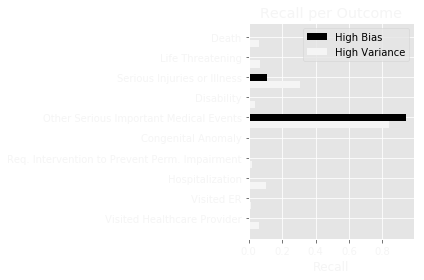

In [125]:
# The colors are optimized for the presentation background color

N = 10
ind = np.arange(N)

fig = plt.figure(frameon=False)
ax = fig.add_subplot(111)

width = 0.35

high_bias_model = classification_random_df['recall']
rects1 = ax.barh(ind, high_bias_model, width, color='000', align='center')


high_variance_model = classification_random_lowbias_df['recall']

rects2 = ax.barh(ind + width, high_variance_model, width, color='#f5f5f5', align='center')

outcomes = ['Death',
 'Life Threatening',
 'Serious Injuries or Illness',
 'Disability',
 'Other Serious Important Medical Events',
 'Congenital Anomaly',
 'Req. Intervention to Prevent Perm. Impairment',
 'Hospitalization',
 'Visited ER',
 'Visited Healthcare Provider']

ax.set_yticks(y_pos)
ax.set_yticklabels(outcomes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Recall', color='#f5f5f5')
ax.set_title('Recall per Outcome', color='#f5f5f5')
plt.xticks(color='#f5f5f5')
plt.yticks(color='#f5f5f5')

ax.legend( (rects1[0], rects2[0]), ('High Bias', 'High Variance') )

plt.tight_layout()
plt.savefig('Project3_RecallPlot', transparent=True)
plt.show()

# Generate a Confusion Matrix to illustrate the recall across classes

[[   9    0   42    1  103    0    0    4    0    1]
 [   0   65  195    2  707    0    1   11    2    2]
 [   2   19  816   12 1806    0    3   26    2    4]
 [   0    1   67   22  343    0    0    8    0    1]
 [   2   20  523   17 3172    0    2   49    4    2]
 [   0    0    1    0    3    0    0    0    0    0]
 [   0    0   37    0   98    0    6    3    0    1]
 [   0    9  227    7 1087    0    2  151    1    2]
 [   0    0   57    0  135    0    0    2    3    1]
 [   0    1   79    2  184    0    1    7    1   18]]


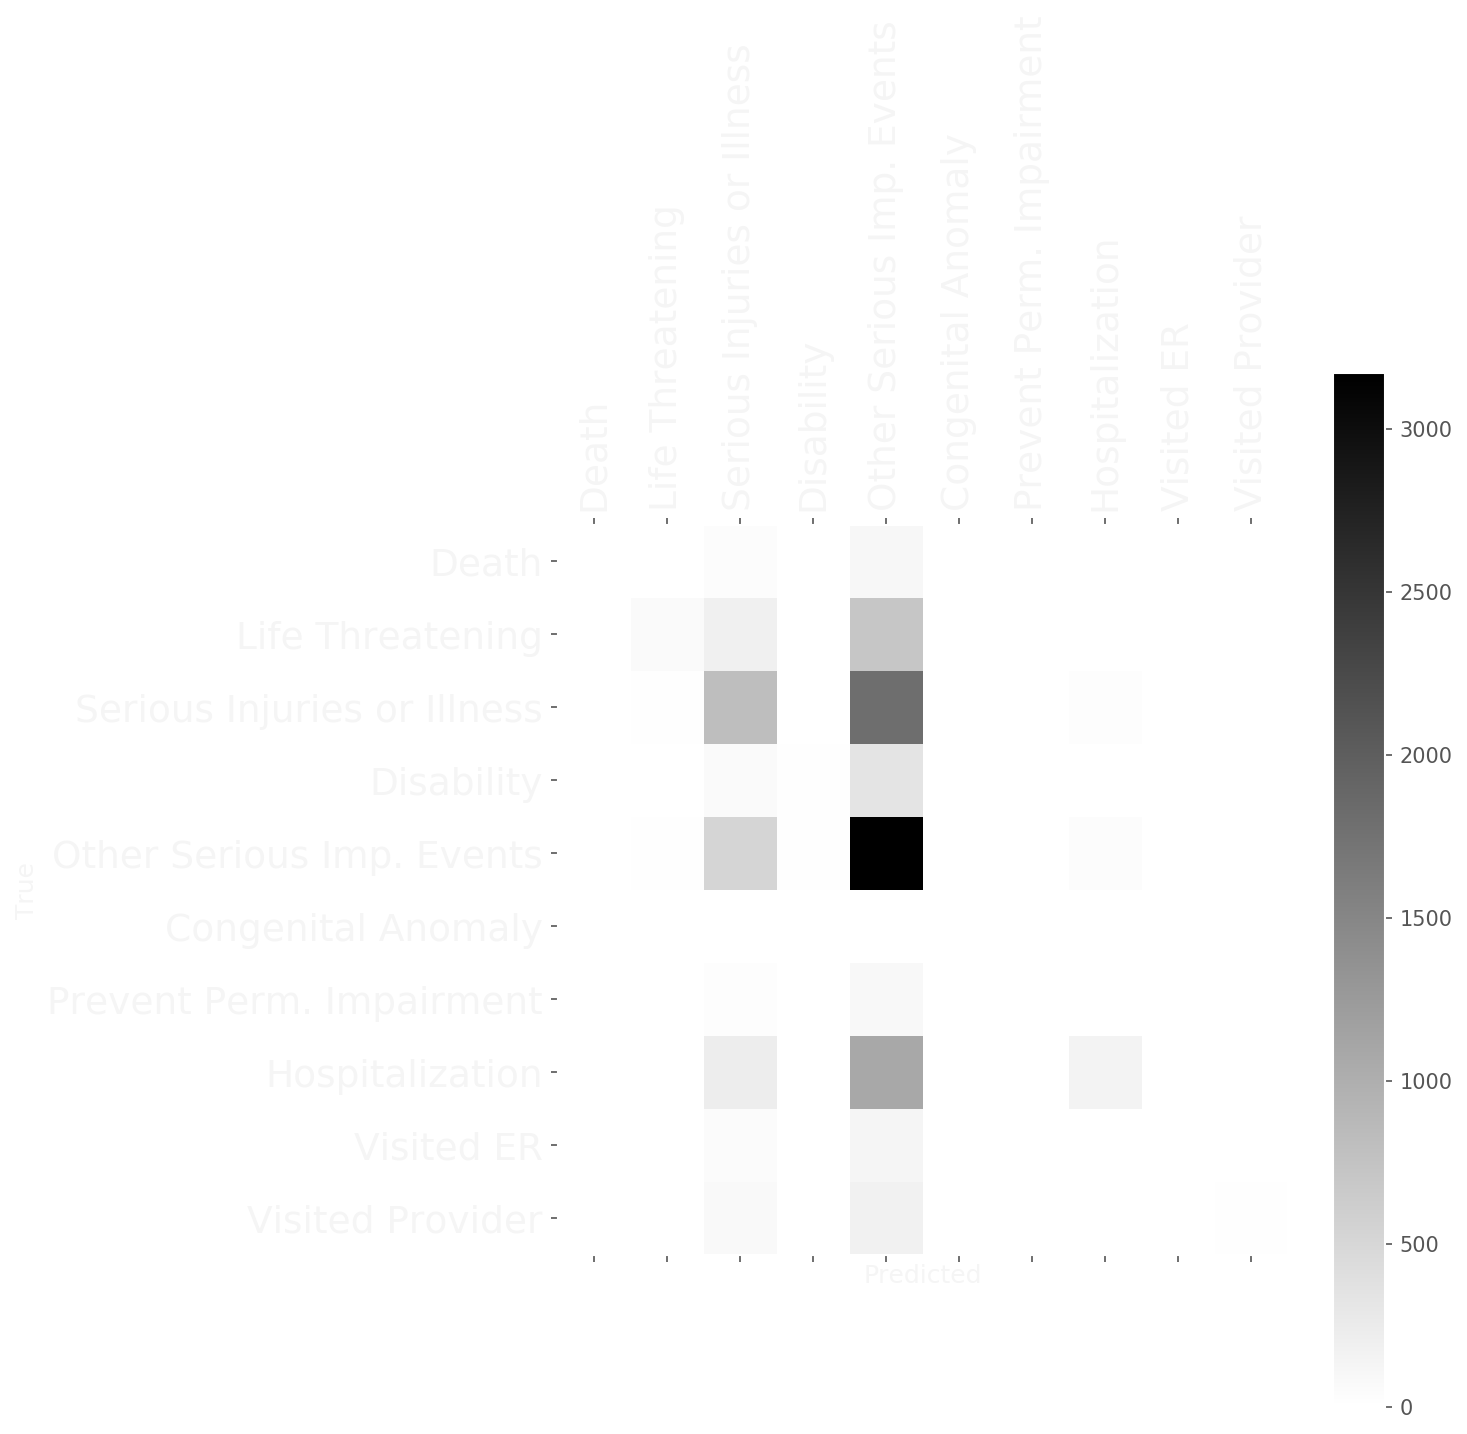

In [112]:
# Colors are optimized for presentation background

labels = ['Death',
 'Life Threatening',
 'Serious Injuries or Illness',
 'Disability',
 'Other Serious Imp. Events',
 'Congenital Anomaly',
 'Prevent Perm. Impairment',
 'Hospitalization',
 'Visited ER',
 'Visited Provider']

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

y_pred = forest_tuned_lowbias_fitted.predict(X_test_noproduct)
cm = confusion_matrix(y_test_noproduct, y_pred, bins)
print(cm)

fs = 18 #fontsize
fig = plt.figure(dpi=150, figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.binary)
fig.colorbar(cax)
plt.xticks(bins,labels, rotation=90, fontsize=fs, color='#f5f5f5')
plt.yticks(bins,labels,fontsize=fs, color='#f5f5f5')
plt.xlabel('Predicted', color='#f5f5f5')
plt.ylabel('True', color='#f5f5f5')
plt.grid(False)
plt.tight_layout()
plt.savefig('Project3_ConfusionMatrix', transparent=True)
plt.show()


# Make word cloud

In [135]:
text = ' '.join(symptoms_to_wiki_search_list)

'swelling face rash wheezing cough hospitalisation dyspnoea choking completed suicide stress symptoms death mitral valve incompetence cerebrovascular accident heart rate increased dizziness blood pressure increased palpitations paraesthesia physical examination orthostatic hypotension chest pain extrasystoles ventricular extrasystoles alopecia arthralgia dermatologic examination hypersensitivity headache hypotrichosis myocardial infarction flushing erythema pain tenderness food poisoning malaise creutzfeldt jakob disease abdominal pain vomiting diarrhoea epistaxis dyspepsia eye oedema sneezing throat tightness vision blurred sinus pain emergency care examination eye pruritus eye irritation burning sensation nausea abdominal pain upper dry throat throat irritation skin bleeding skin burning sensation blister burns second degree rigors paraesthesia oral impaired driving ability asthenia lethargy depressed mood muscle injury feeling abnormal tachycardia caustic injury loose stools flatule

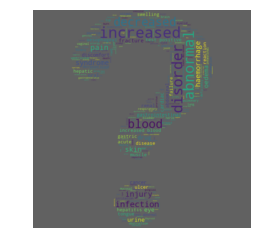

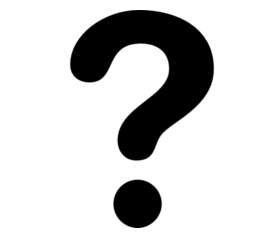

In [141]:
# Background color of wordcloud optimized for presentation background
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = path.dirname('/home/victoria/Downloads/question_2.jpg')

# Read the whole text.
text = text = ' '.join(symptoms_to_wiki_search_list)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "question_2.jpg")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="#616161", max_words=2000, mask=alice_mask,
               stopwords=stopwords)

# generate word cloud
wc.generate_from_text(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
wc.to_file('question_mark_symptoms_white.png')
plt.axis("off")
plt.show()

In [66]:
list()

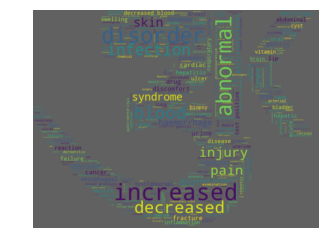

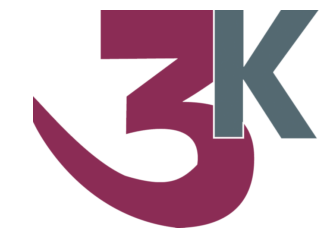

In [144]:
d = path.dirname('/home/victoria/Downloads/3k.png')

# Read the whole text.
text = text = ' '.join(symptoms_to_wiki_search_list)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "3k.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="#616161", max_words=2000, mask=alice_mask,
               stopwords=stopwords)

# generate word cloud
wc.generate_from_text(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
wc.to_file('3k_symptoms_wc.png')
plt.axis("off")
plt.show()

In [145]:
list(lookup_symptoms_dict.keys())

['swelling face',
 'rash',
 'wheezing',
 'cough',
 'hospitalisation',
 'dyspnoea',
 'choking',
 'completed suicide',
 'stress symptoms',
 'death',
 'mitral valve incompetence',
 'cerebrovascular accident',
 'heart rate increased',
 'dizziness',
 'blood pressure increased',
 'palpitations',
 'paraesthesia',
 'physical examination',
 'orthostatic hypotension',
 'chest pain',
 'extrasystoles',
 'ventricular extrasystoles',
 'alopecia',
 'arthralgia',
 'dermatologic examination',
 'hypersensitivity',
 'headache',
 'hypotrichosis',
 'myocardial infarction',
 'flushing',
 'erythema',
 'pain',
 'tenderness',
 'food poisoning',
 'malaise',
 'creutzfeldt',
 'jakob disease',
 'abdominal pain',
 'vomiting',
 'diarrhoea',
 'epistaxis',
 'dyspepsia',
 'eye oedema',
 'sneezing',
 'throat tightness',
 'vision blurred',
 'sinus pain',
 'emergency care examination',
 'eye pruritus',
 'eye irritation',
 'burning sensation',
 'nausea',
 'abdominal pain upper',
 'dry throat',
 'throat irritation',
 'skin 

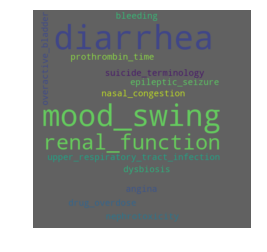

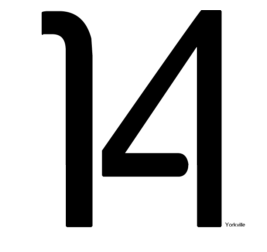

In [170]:
d = path.dirname('/home/victoria/Downloads/14.png')

# Read the whole text.
text = text = ' '.join(['diarrhea', 'mood_swing', 'renal_function',
       'upper_respiratory_tract_infection', 'prothrombin_time', 'bleeding',
       'nasal_congestion', 'drug_overdose', 'angina', 'dysbiosis',
       'overactive_bladder', 'suicide_terminology', 'epileptic_seizure',
       'nephrotoxicity', 'diarrhea', 'mood_swing'])

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "14.png")))


wc = WordCloud(background_color="#616161", max_words=2000, mask=alice_mask)

# generate word cloud
wc.generate_from_text(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
wc.to_file('3k_symptoms_wc.png')
plt.axis("off")
plt.show()

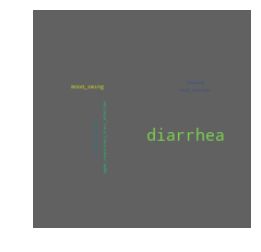

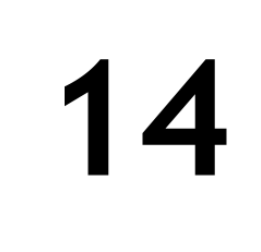

In [169]:
# d = path.dirname('/home/victoria/Downloads/14.png')

# Read the whole text.
text = text = ' '.join(['diarrhea', 'mood_swing', 'renal_function',
       'upper_respiratory_tract_infection', 'prothrombin_time', 'bleeding',
       'nasal_congestion', 'drug_overdose', 'angina', 'dysbiosis',
       'overactive_bladder', 'suicide_terminology', 'epileptic_seizure',
       'nephrotoxicity', 'diarrhea', 'mood_swing'])

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
# alice_mask = np.array(Image.open(path.join(d, "14.png")))


# wc = WordCloud(background_color="#616161", max_words=2000, mask=alice_mask)

# generate word cloud
wc.generate_from_text(text)

# store to file
# wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
wc.to_file('14_symptoms_wc.png')
plt.axis("off")
plt.show()

# Summary

### What I did 
1. Created a barchart to illustrate the uneven distribution of recall across classes with the high bias model and the more evenly distributed recall across classes with the high variance model
2. Created a confusion matrix to illustrate the recall across classes within the final chosen model (the high variance model)
3. Made a word cloud as an interesting image to represent the 13k unique symptoms that I needed to categorize for feature engineering purposes

### What I will do next
Create the end user queries for the flask app.